<a href="https://colab.research.google.com/github/yyic1203/Cuantica/blob/main/Cu%C3%A1ntica_taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar



#Ejercicio 4.5 a

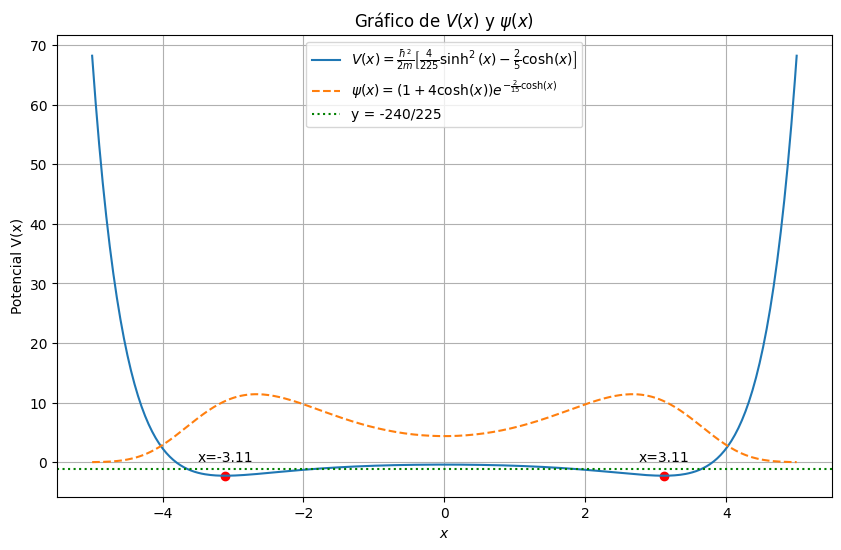

Mínimo 1: x = -3.11, V(x) = -2.27e+00
Mínimo 2: x = 3.11, V(x) = -2.27e+00


In [7]:
# Definimos la función V(x)
def V(x):
    return ((4/225) * np.sinh(x)**2 - (2/5) * np.cosh(x))

# Definimos la función psi(x)
def psi(x):
    return (1 + 4 * np.cosh(x)) * np.exp(-2/15 * np.cosh(x))

# Generamos valores de x para graficar
x = np.linspace(-5, 5, 400)

# Calculamos los valores de V(x) y psi(x)
v_values = V(x)
psi_values = psi(x)

# Creamos la figura para graficar
plt.figure(figsize=(10, 6))

# Graficamos la función V(x)
plt.plot(x, v_values, label=r'$V(x) = \frac{\hbar^2}{2m} \left[\frac{4}{225}\sinh^2(x) - \frac{2}{5}\cosh(x)\right]$')

# Graficamos la función psi(x)
plt.plot(x, psi_values, label=r'$\psi(x) = (1 + 4 \cosh(x)) e^{-\frac{2}{15} \cosh(x)}$', linestyle='--')

# Graficamos la línea horizontal en y = -240/225
plt.axhline(y=-240/225, color='green', linestyle=':', label='y = -240/225')

# Configuramos el título y las etiquetas
plt.title('Gráfico de $V(x)$ y $\psi(x)$')
plt.xlabel('$x$')
plt.ylabel('Potencial V(x)')
plt.grid(True)

# Encontramos mínimos en distintos subrangos
subranges = [(-5, 0), (0, 5)]
minima = []

for bounds in subranges:
    result = minimize_scalar(V, bounds=bounds, method='bounded')
    if result.success:  # Verificamos que la optimización haya sido exitosa
        minima.append((result.x, result.fun))
        plt.scatter(result.x, result.fun, marker='o', color='red')
        plt.annotate(f'x={result.x:.2f}', (result.x, result.fun), textcoords="offset points", xytext=(0,10), ha='center')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.show()

# Imprimimos los mínimos encontrados
for idx, (x_min, v_min) in enumerate(minima):
    print(f'Mínimo {idx+1}: x = {x_min:.2f}, V(x) = {v_min:.2e}')
